## Import Libraries & Load Dataset


In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. LOAD DATA -----------------------------------------------------  
df = pd.read_csv(r"D:\Desktop\DAB 2025 FALL\CAPSTONE PROJECT\NYC Project\sampled_10_percent_by_month.csv")

print("Loaded dataset:", df.shape)

Loaded dataset: (383102, 30)


## Dataset Overview

In [125]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickup_borough,pickup_zone,dropoff_borough,dropoff_zone,payment_method,pickup_borough.1,pickup_zone.1,dropoff_borough.1,dropoff_zone.1,year_month
0,2,15-01-2023 04:05,15-01-2023 04:10,1.0,0.57,1.0,N,164,170,1,...,Manhattan,Midtown South,Manhattan,Murray Hill,Credit card,Manhattan,Midtown South,Manhattan,Murray Hill,2023-01
1,2,31-01-2023 23:29,31-01-2023 23:40,1.0,2.09,1.0,N,107,158,1,...,Manhattan,Gramercy,Manhattan,Meatpacking/West Village West,Credit card,Manhattan,Gramercy,Manhattan,Meatpacking/West Village West,2023-01
2,1,24-01-2023 18:15,24-01-2023 18:27,1.0,2.00,1.0,N,231,107,1,...,Manhattan,TriBeCa/Civic Center,Manhattan,Gramercy,Credit card,Manhattan,TriBeCa/Civic Center,Manhattan,Gramercy,2023-01
3,1,31-01-2023 21:00,31-01-2023 21:07,1.0,2.00,1.0,N,236,166,1,...,Manhattan,Upper East Side North,Manhattan,Morningside Heights,Credit card,Manhattan,Upper East Side North,Manhattan,Morningside Heights,2023-01
4,2,24-01-2023 17:50,24-01-2023 18:01,1.0,1.39,1.0,N,163,143,2,...,Manhattan,Midtown North,Manhattan,Lincoln Square West,Cash,Manhattan,Midtown North,Manhattan,Lincoln Square West,2023-01


In [126]:
df['payment_type'].unique()

array([1, 2, 0, 4, 3])

In [127]:
df.tail()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickup_borough,pickup_zone,dropoff_borough,dropoff_zone,payment_method,pickup_borough.1,pickup_zone.1,dropoff_borough.1,dropoff_zone.1,year_month
383097,2,26-12-2023 20:44,26-12-2023 20:59,1.0,5.11,1.0,N,79,231,1,...,Manhattan,East Village,Manhattan,TriBeCa/Civic Center,Credit card,Manhattan,East Village,Manhattan,TriBeCa/Civic Center,2023-12
383098,1,16-12-2023 00:31,16-12-2023 00:55,0.0,4.70,1.0,N,229,148,1,...,Manhattan,Sutton Place/Turtle Bay North,Manhattan,Lower East Side,Credit card,Manhattan,Sutton Place/Turtle Bay North,Manhattan,Lower East Side,2023-12
383099,2,11-12-2023 18:32,11-12-2023 18:41,1.0,1.17,1.0,N,233,141,2,...,Manhattan,UN/Turtle Bay South,Manhattan,Lenox Hill West,Cash,Manhattan,UN/Turtle Bay South,Manhattan,Lenox Hill West,2023-12
383100,2,16-12-2023 21:59,16-12-2023 22:35,5.0,3.85,1.0,N,141,79,1,...,Manhattan,Lenox Hill West,Manhattan,East Village,Credit card,Manhattan,Lenox Hill West,Manhattan,East Village,2023-12
383101,2,31-12-2023 04:14,31-12-2023 04:31,2.0,3.57,1.0,N,141,100,1,...,Manhattan,Lenox Hill West,Manhattan,Garment District,Credit card,Manhattan,Lenox Hill West,Manhattan,Garment District,2023-12


In [128]:
df.describe()


,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,airport_fee
count,383102.000000,369801.000000,383102.000000,369801.000000,383102.000000,383102.000000,383102.000000,383102.000000,383102.000000,383102.000000,383102.000000,383102.000000,383102.000000,383102.000000,369801.000000,339848.000000,29953.000000
mean,1.739281,1.372844,3.993035,1.639533,165.214695,164.130354,1.183562,19.479310,1.556979,0.485736,3.523212,0.587858,0.979550,28.421835,2.265097,0.143407,0.107251
std,0.443935,0.895622,153.260257,7.414239,63.947180,69.818575,0.556549,18.894575,1.843615,0.108300,4.066141,2.195213,0.198674,23.594731,0.796810,0.477202,0.355417
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-645.000000,-7.500000,-0.500000,-18.500000,-63.100000,-1.000000,-516.800000,-2.500000,-1.750000,-1.250000
25%,1.000000,1.000000,1.040000,1.000000,132.000000,114.000000,1.000000,9.300000,0.000000,0.500000,1.000000,0.000000,1.000000,15.950000,2.500000,0.000000,0.000000
50%,2.000000,1.000000,1.790000,1.000000,162.000000,162.000000,1.000000,13.500000,1.000000,0.500000,2.800000,0.000000,1.000000,21.000000,2.500000,0.000000,0.000000
75%,2.000000,1.000000,3.400000,1.000000,234.000000,234.000000,1.000000,21.900000,2.500000,0.500000,4.410000,0.000000,1.000000,30.720000,2.500000,0.000000,0.000000
max,6.000000,8.000000,73223.800000,99.000000,265.000000,265.000000,4.000000,728.900000,14.250000,4.000000,300.000000,81.550000,1.000000,762.450000,2.500000,1.750000,1.250000


In [129]:

df.sample(5)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickup_borough,pickup_zone,dropoff_borough,dropoff_zone,payment_method,pickup_borough.1,pickup_zone.1,dropoff_borough.1,dropoff_zone.1,year_month
110233,2,20-04-2023 12:12,20-04-2023 12:38,1.0,2.28,1.0,N,237,68,1,...,Manhattan,Upper East Side South,Manhattan,East Chelsea,Credit card,Manhattan,Upper East Side South,Manhattan,East Chelsea,2023-04
381892,1,10-12-2023 23:37,10-12-2023 23:40,2.0,0.90,1.0,N,100,186,1,...,Manhattan,Garment District,Manhattan,Penn Station/Madison Sq West,Credit card,Manhattan,Garment District,Manhattan,Penn Station/Madison Sq West,2023-12
125577,2,14-04-2023 00:38,14-04-2023 00:51,1.0,1.56,1.0,N,4,249,2,...,Manhattan,Alphabet City,Manhattan,West Village,Cash,Manhattan,Alphabet City,Manhattan,West Village,2023-04
55706,1,06-02-2023 19:13,06-02-2023 19:18,NaN,0.50,NaN,NaN,113,79,0,...,Manhattan,Greenwich Village North,Manhattan,East Village,NaN,Manhattan,Greenwich Village North,Manhattan,East Village,2023-02
69145,1,08-03-2023 20:11,08-03-2023 20:17,NaN,0.60,NaN,NaN,236,236,0,...,Manhattan,Upper East Side North,Manhattan,Upper East Side North,NaN,Manhattan,Upper East Side North,Manhattan,Upper East Side North,2023-03


In [130]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383102 entries, 0 to 383101
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               383102 non-null  int64  
 1   tpep_pickup_datetime   383102 non-null  object 
 2   tpep_dropoff_datetime  383102 non-null  object 
 3   passenger_count        369801 non-null  float64
 4   trip_distance          383102 non-null  float64
 5   RatecodeID             369801 non-null  float64
 6   store_and_fwd_flag     369801 non-null  object 
 7   PULocationID           383102 non-null  int64  
 8   DOLocationID           383102 non-null  int64  
 9   payment_type           383102 non-null  int64  
 10  fare_amount            383102 non-null  float64
 11  extra                  383102 non-null  float64
 12  mta_tax                383102 non-null  float64
 13  tip_amount             383102 non-null  float64
 14  tolls_amount           383102 non-nu

In [131]:
#assign labels to payment type
payment_map = {
    0: "Flex Fare trip",
    1: "Credit card",
    2: "Cash",
    3: "No charge",
    4: "Dispute",
    5: "Unknown",
    6: "Voided trip"
}

df["payment_type"] = df["payment_type"].map(payment_map)


In [132]:
# Remove airport fee with higher missing
fee_cols = [col for col in df.columns if col.lower()=='airport_fee']
if len(fee_cols) == 2:
    missing = df[fee_cols].isna().sum()
    col_to_drop = missing.idxmax()
    df = df.drop(columns=[col_to_drop])

# 2. REMOVE DUPLICATE COLUMNS -------------------------------------
cols_to_drop = [c for c in df.columns if c.endswith(".1")]
df = df.drop(columns=cols_to_drop)

df.columns = [c.strip() for c in df.columns]   # cleanup column names

In [133]:
df.duplicated().sum()

np.int64(0)

In [134]:
# 3. CONVERT TIME COLUMNS -----------------------------------------
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"], errors="coerce")
df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"], errors="coerce")


C:\Users\gowri\AppData\Local\Temp\ipykernel_1732\2478397805.py:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"], errors="coerce")
C:\Users\gowri\AppData\Local\Temp\ipykernel_1732\2478397805.py:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"], errors="coerce")


In [135]:
# 4. CREATE NEW FEATURES ------------------------------------------
df["trip_duration_min"] = (df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]).dt.total_seconds() / 60
df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour
df["pickup_weekday"] = df["tpep_pickup_datetime"].dt.day_name()
if "year_month" not in df.columns:
    df["year_month"] = df["tpep_pickup_datetime"].dt.to_period("M").astype(str)

In [136]:
#prints how many columns in your dataset belong to each type
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns
dt_cols = df.select_dtypes(include=['datetime64[ns]']).columns

print("Numerical:", len(num_cols))
print("Categorical:", len(cat_cols))
print("Datetime:", len(dt_cols))

Numerical: 16
Categorical: 9
Datetime: 2


In [137]:
df.shape

(383102, 28)

In [138]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee', 'pickup_borough',
       'pickup_zone', 'dropoff_borough', 'dropoff_zone', 'payment_method',
       'year_month', 'trip_duration_min', 'pickup_hour', 'pickup_weekday'],
      dtype='object')

In [139]:
# 5. FILTER INVALID TRIPS -----------------------------------------
initial = len(df)

df = df[
    (df["trip_distance"] > 0) &
    (df["fare_amount"] >= 0) &
    (df["trip_duration_min"] >= 0) &
    (df["trip_duration_min"] <= 600)      # <= 10 hours
].copy()

print(f"Removed {initial - len(df):,} invalid rows")



Removed 11,541 invalid rows


In [140]:
# Check missing values in the dataset
missing_values = df.isna().sum().sort_values(ascending=False)

print("🔍 Missing Values in Each Column:")
print(missing_values)


🔍 Missing Values in Each Column:
Airport_fee              39552
passenger_count          10201
store_and_fwd_flag       10201
RatecodeID               10201
congestion_surcharge     10201
payment_method           10201
dropoff_zone              3277
pickup_zone               3198
dropoff_borough           1514
pickup_borough             146
tpep_dropoff_datetime        0
VendorID                     0
extra                        0
fare_amount                  0
payment_type                 0
DOLocationID                 0
PULocationID                 0
trip_distance                0
tpep_pickup_datetime         0
mta_tax                      0
total_amount                 0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
year_month                   0
trip_duration_min            0
pickup_hour                  0
pickup_weekday               0
dtype: int64


In [141]:
#Use median imputation, except when missing values imply "not applicable
df["passenger_count"] = df["passenger_count"].fillna(df["passenger_count"].median())
df["RatecodeID"] = df["RatecodeID"].fillna(df["RatecodeID"].mode()[0])


In [142]:
#Use mode (most frequent value) or logical default
df["store_and_fwd_flag"] = df["store_and_fwd_flag"].fillna("N")


In [143]:
# Check if any negative values exist in fare_amount column
negative_fares = df[df["fare_amount"] < 0]

print(f"Number of negative fare_amount values: {len(negative_fares)}")
negative_fares.head()

Number of negative fare_amount values: 0


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,Airport_fee,pickup_borough,pickup_zone,dropoff_borough,dropoff_zone,payment_method,year_month,trip_duration_min,pickup_hour,pickup_weekday


In [144]:
# Remove all rows where fare_amount < 0
df = df[df["fare_amount"] >= 0]

print("Negative fare rows removed successfully.")
print(f"Remaining rows in dataset: {len(df)}")


Negative fare rows removed successfully.
Remaining rows in dataset: 371561


In [145]:
(df["fare_amount"] < 0).sum()


np.int64(0)

In [146]:
# 7. DESCRIPTIVE STATISTICS ---------------------------------------
print("\n Descriptive Statistics (numeric):")
print(df.describe())


 Descriptive Statistics (numeric):
            VendorID           tpep_pickup_datetime  \
count  371561.000000                         371561   
mean        1.743576  2023-07-02 03:08:51.967294720   
min         1.000000            2023-01-01 00:00:00   
25%         1.000000            2023-04-01 23:49:00   
50%         2.000000            2023-06-26 10:45:00   
75%         2.000000            2023-10-05 23:17:00   
max         6.000000            2023-12-31 23:57:00   
std         0.441745                            NaN   

               tpep_dropoff_datetime  passenger_count  trip_distance  \
count                         371561    371561.000000  371561.000000   
mean   2023-07-02 03:25:23.419896320         1.362953       4.082320   
min              2023-01-01 00:09:00         0.000000       0.010000   
25%              2023-04-02 00:05:00         1.000000       1.100000   
50%              2023-06-26 11:02:00         1.000000       1.810000   
75%              2023-10-05 23:31:00

## Outlier Detection

In [147]:
# -------- OUTLIER DETECTION: IQR METHOD -----------
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    print(f"{column}: {len(outliers):,} outliers detected using IQR")
    return outliers

# Detect on key numeric fields
distance_outliers = detect_outliers_iqr(df, "trip_distance")
fare_outliers     = detect_outliers_iqr(df, "fare_amount")
duration_outliers = detect_outliers_iqr(df, "trip_duration_min")

trip_distance: 49,228 outliers detected using IQR
fare_amount: 38,502 outliers detected using IQR
trip_duration_min: 21,818 outliers detected using IQR


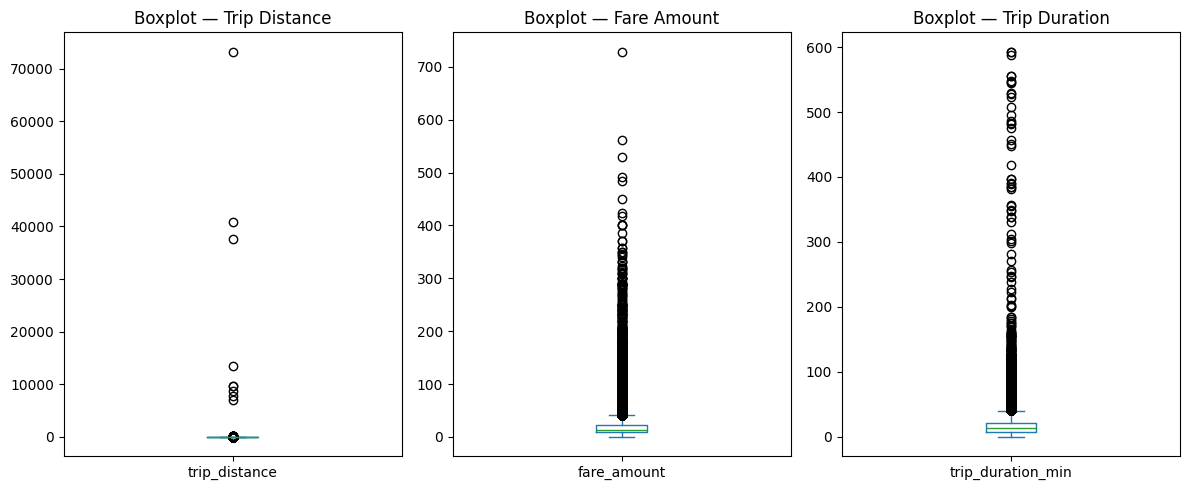

In [148]:
plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
df["trip_distance"].plot(kind="box")
plt.title("Boxplot — Trip Distance")

plt.subplot(1,3,2)
df["fare_amount"].plot(kind="box")
plt.title("Boxplot — Fare Amount")

plt.subplot(1,3,3)
df["trip_duration_min"].plot(kind="box")
plt.title("Boxplot — Trip Duration")

plt.tight_layout()
plt.show()



## Handling Outliers

In [149]:
#removing outliers
df_no_outliers = df[
    (df["trip_distance"].between(df["trip_distance"].quantile(0.25) - 1.5 * (df["trip_distance"].quantile(0.75) - df["trip_distance"].quantile(0.25)),
                                 df["trip_distance"].quantile(0.75) + 1.5 * (df["trip_distance"].quantile(0.75) - df["trip_distance"].quantile(0.25)))) &
    (df["fare_amount"].between(df["fare_amount"].quantile(0.25) - 1.5 * (df["fare_amount"].quantile(0.75) - df["fare_amount"].quantile(0.25)),
                               df["fare_amount"].quantile(0.75) + 1.5 * (df["fare_amount"].quantile(0.75) - df["fare_amount"].quantile(0.25))))
]
print("Removed outliers. New shape:", df_no_outliers.shape)


Removed outliers. New shape: (320785, 28)


In [150]:
# 8. TOP PICKUP & DROPOFF LOCATIONS -------------------------------
print("\n Top Pickup Zones:")
print(df["PULocationID"].value_counts().head(10))


 Top Pickup Zones:
PULocationID
132    19044
237    17780
161    17348
236    15768
162    13356
138    13024
186    12870
230    12413
142    12205
170    11014
Name: count, dtype: int64


In [151]:
print("\n Top Dropoff Zones:")
print(df["DOLocationID"].value_counts().head(10))


 Top Dropoff Zones:
DOLocationID
236    16530
237    15729
161    14434
230    11659
170    11186
162    10638
142    10517
239    10435
141     9822
68      9486
Name: count, dtype: int64


In [152]:
# 9. TRIPS PER MONTH ----------------------------------------------
print("\n Trips per Month:")
print(df.groupby("year_month").size())


 Trips per Month:
year_month
2023-01    30001
2023-02    28445
2023-03    33287
2023-04    32186
2023-05    34352
2023-06    32282
2023-07    28259
2023-08    27367
2023-09    27171
2023-10    33650
2023-11    31935
2023-12    32626
dtype: int64


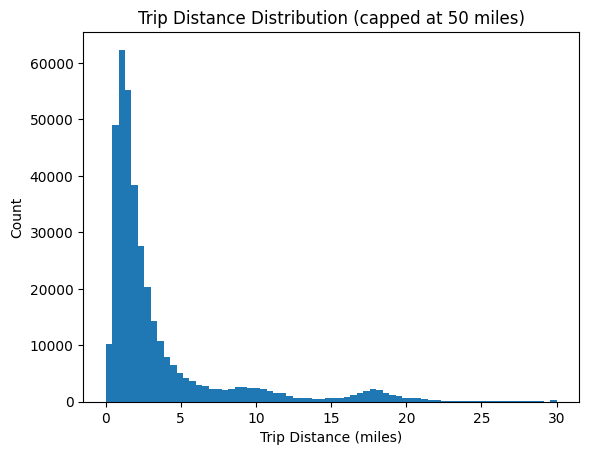

In [153]:
# ----------------- VISUALIZATIONS --------------------------------
# Histogram: Trip Distance
plt.hist(df["trip_distance"].clip(upper=30), bins=70)
plt.title("Trip Distance Distribution (capped at 50 miles)")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Count")
plt.show()

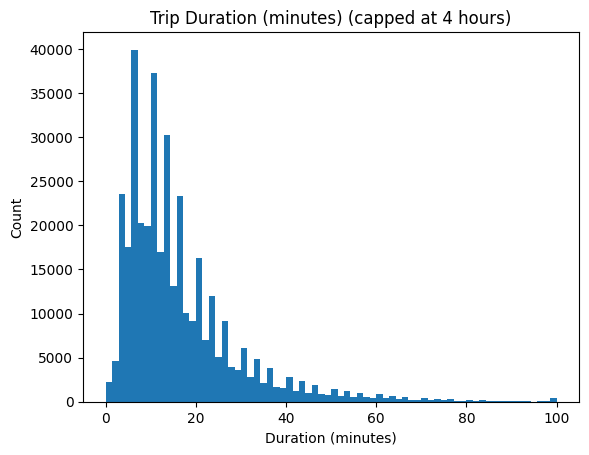

In [154]:
# Histogram: Trip Duration
plt.hist(df["trip_duration_min"].clip(upper=100), bins=70)
plt.title("Trip Duration (minutes) (capped at 4 hours)")
plt.xlabel("Duration (minutes)")
plt.ylabel("Count")
plt.show()

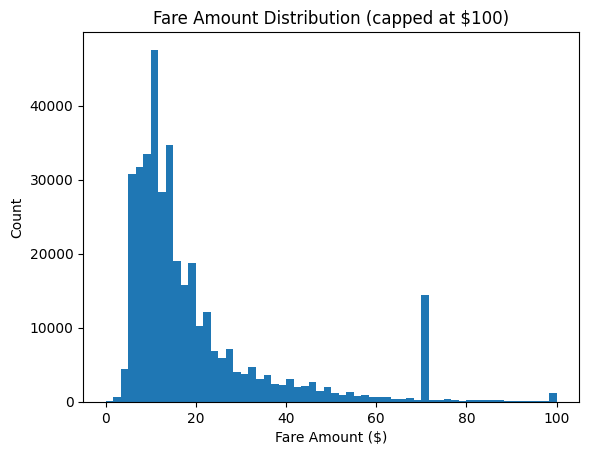

In [155]:
# Histogram: Fare Amount
plt.hist(df["fare_amount"].clip(upper=100), bins=60)
plt.title("Fare Amount Distribution (capped at $100)")
plt.xlabel("Fare Amount ($)")
plt.ylabel("Count")
plt.show()

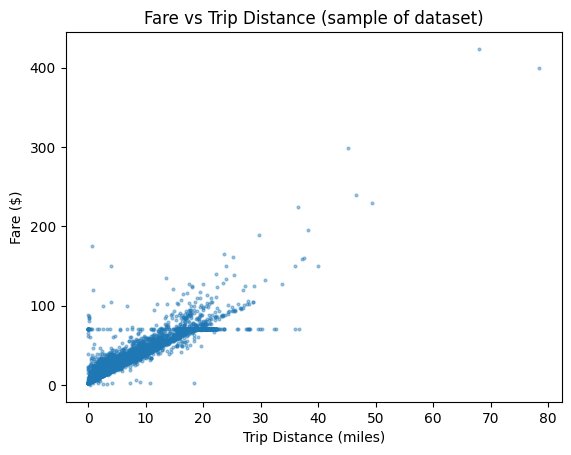

In [156]:
# Scatter: Distance vs Fare
sample = df.sample(n=min(20000, len(df)), random_state=42)
plt.scatter(sample["trip_distance"], sample["fare_amount"], alpha=0.4, s=4)
plt.title("Fare vs Trip Distance (sample of dataset)")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare ($)")
plt.show()

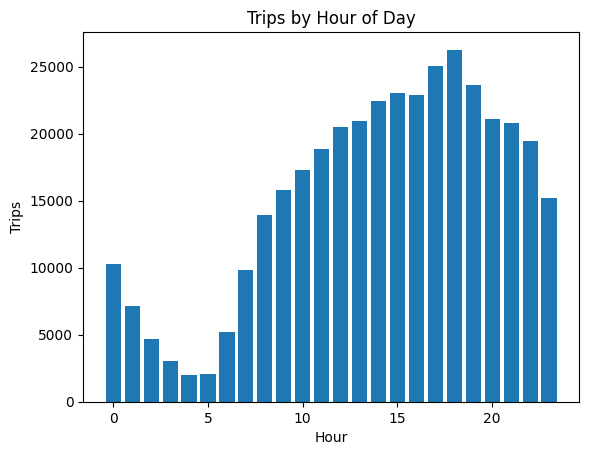

In [157]:
# Trips by hour of day
plt.bar(df["pickup_hour"].value_counts().sort_index().index,
        df["pickup_hour"].value_counts().sort_index().values)
plt.title("Trips by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Trips")
plt.show()

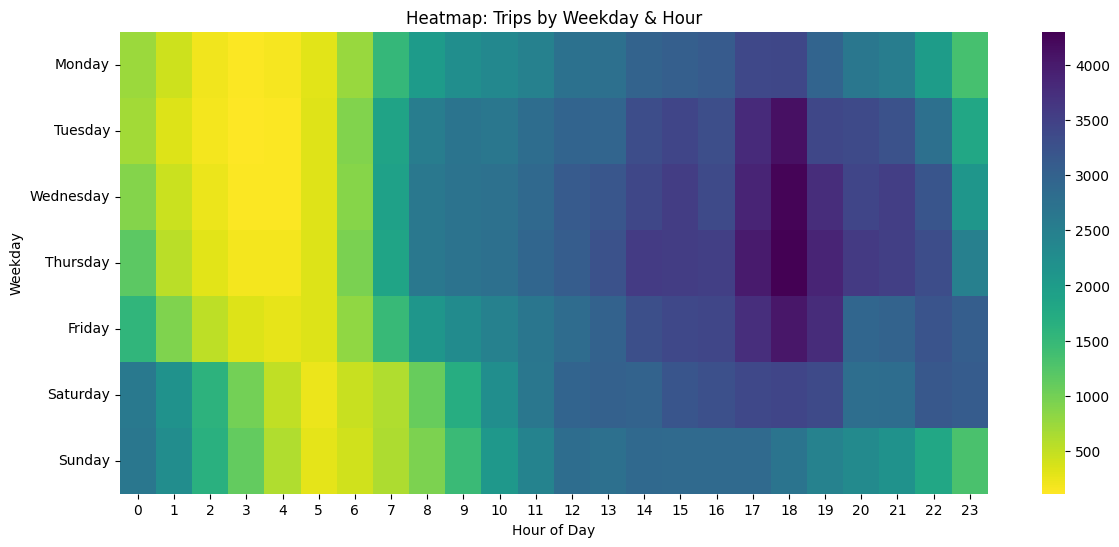

In [158]:
plt.figure(figsize=(14,6))
sns.heatmap(pivot, cmap="viridis_r")
plt.xlabel("Hour of Day")
plt.ylabel("Weekday")
plt.title("Heatmap: Trips by Weekday & Hour")
plt.show()



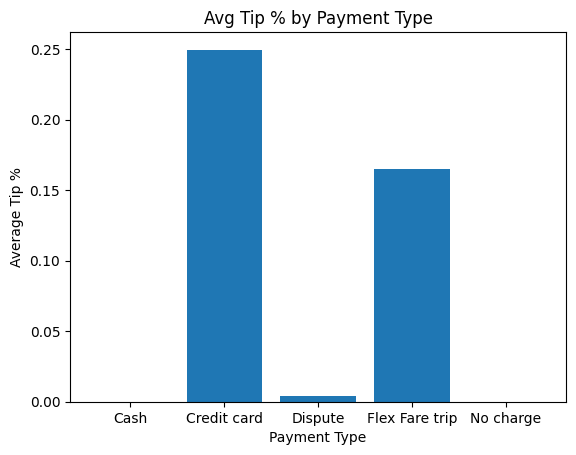

In [159]:
# Tip Percentage vs Payment type
df["tip_pct"] = np.where(df["fare_amount"] > 0, df["tip_amount"] / df["fare_amount"], 0)

plt.bar(df.groupby("payment_type")["tip_pct"].mean().index.astype(str),
        df.groupby("payment_type")["tip_pct"].mean().values)
plt.title("Avg Tip % by Payment Type")
plt.xlabel("Payment Type")
plt.ylabel("Average Tip %")
plt.show()

In [160]:
df['payment_type']

0         Credit card
1         Credit card
2         Credit card
3         Credit card
4                Cash
             ...     
383097    Credit card
383098    Credit card
383099           Cash
383100    Credit card
383101    Credit card
Name: payment_type, Length: 371561, dtype: object

<h2>Univariate Analysis</h2>

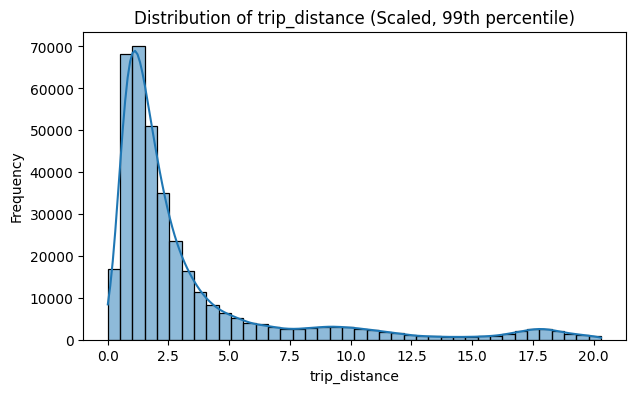

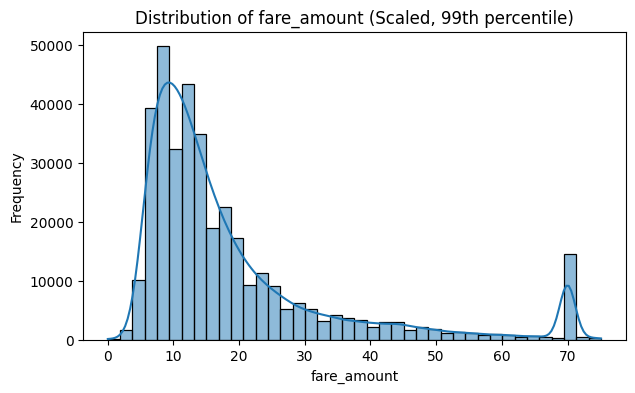

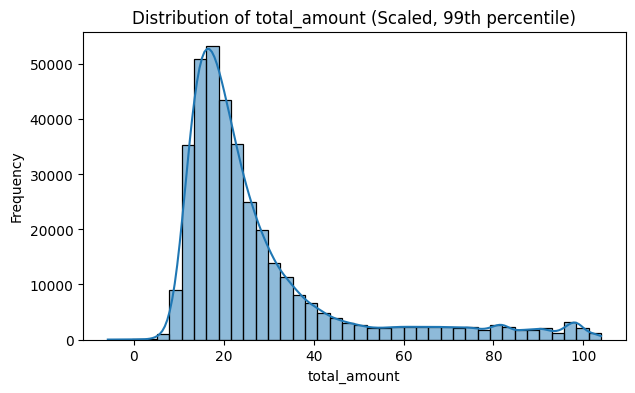

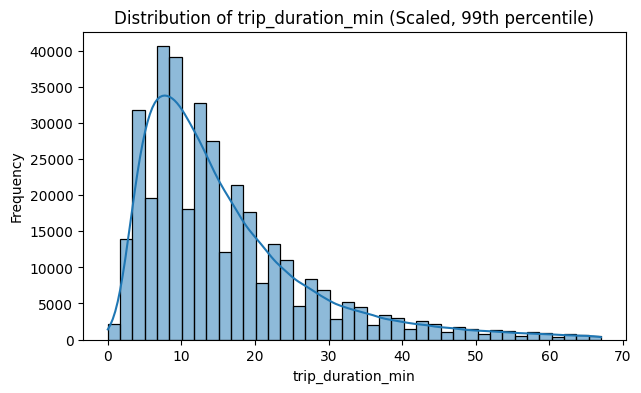

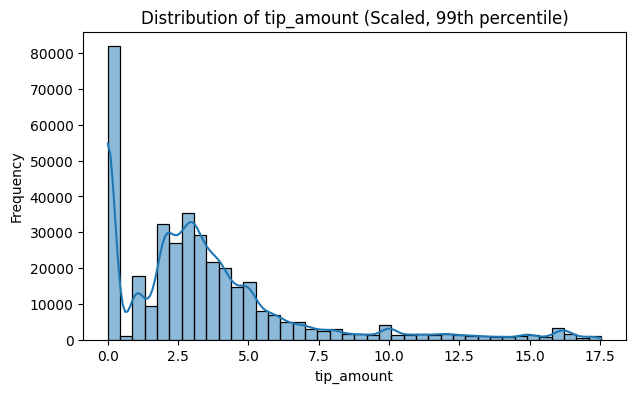

In [161]:


numeric_cols = ["trip_distance", "fare_amount", "total_amount", 
                "trip_duration_min", "tip_amount"]
for col in numeric_cols:
    plt.figure(figsize=(7,4))
    
    # calculate 99th percentile
    upper_limit = df[col].quantile(0.99)
    
    sns.histplot(df[df[col] <= upper_limit][col], bins=40, kde=True)
    plt.title(f"Distribution of {col} (Scaled, 99th percentile)")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()



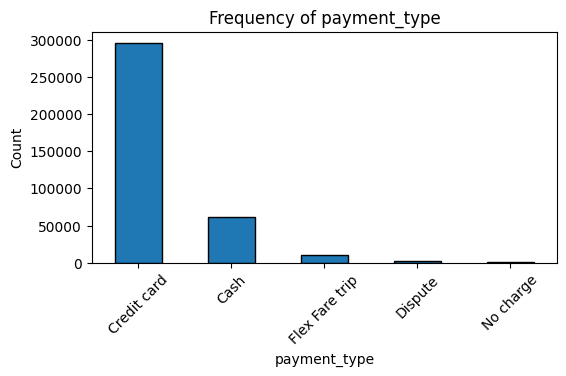

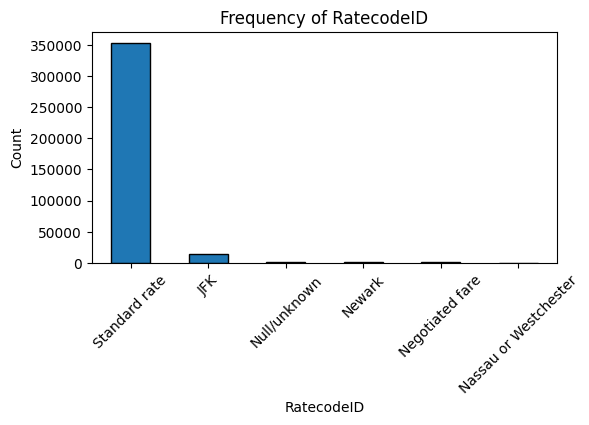

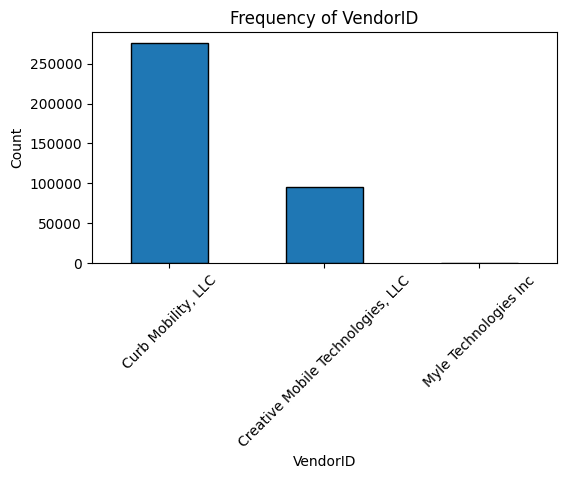

In [162]:
# ---------------- UNIVARIATE ANALYSIS: CATEGORICAL -----------------

ratecode_map = {
    1: "Standard rate",
    2: "JFK",
    3: "Newark",
    4: "Nassau or Westchester",
    5: "Negotiated fare",
    6: "Group ride",
    99: "Null/unknown"
}

vendor_map = {
    1: "Creative Mobile Technologies, LLC",
    2: "Curb Mobility, LLC",
    6: "Myle Technologies Inc",
    7: "Helix"
}
df["VendorID"] = df["VendorID"].map(vendor_map)
df["RatecodeID"] = df["RatecodeID"].map(ratecode_map)
categorical_cols = ["payment_type", "RatecodeID", "VendorID"]

for col in categorical_cols:
    plt.figure(figsize=(6,3))
    df[col].value_counts().plot(kind="bar", edgecolor="black")
    plt.title(f"Frequency of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()


<h2>Bivariate Analysis</h2>

<h3>Numerical vs numerical (scatter)</h3>

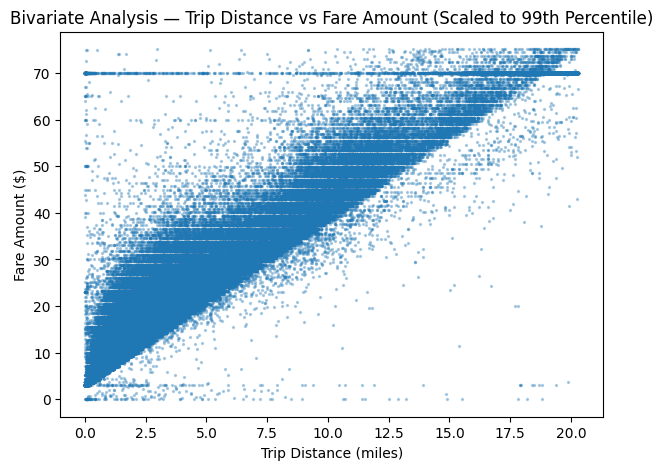

In [170]:
# --- Calculate 99th percentiles ---
dist_99 = df["trip_distance"].quantile(0.99)
fare_99 = df["fare_amount"].quantile(0.99)

# --- Filter the dataframe for plotting ---
df_plot = df[
    (df["trip_distance"] <= dist_99) &
    (df["fare_amount"] <= fare_99)
]

# --- Scatter Plot ---
plt.figure(figsize=(7,5))
plt.scatter(df_plot["trip_distance"], df_plot["fare_amount"], alpha=0.3, s=2)
plt.title("Bivariate Analysis — Trip Distance vs Fare Amount (Scaled to 99th Percentile)")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.show()



<h3>Categorical vs numerical (boxplot)</h3>

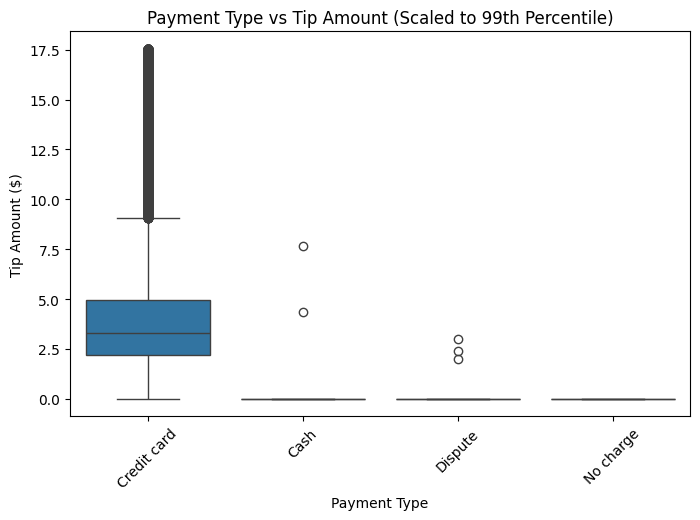

In [174]:
# Calculate 99th percentile for tip_amount
tip_99 = df["tip_amount"].quantile(0.99)

plt.figure(figsize=(8,5))
sns.boxplot(data=df[df["tip_amount"] <= tip_99], x="payment_method", y="tip_amount")
plt.title("Payment Type vs Tip Amount (Scaled to 99th Percentile)")
plt.xlabel("Payment Type")
plt.ylabel("Tip Amount ($)")
plt.xticks(rotation=45)
plt.show()


<h3>Time vs numerical (line)</h3>>

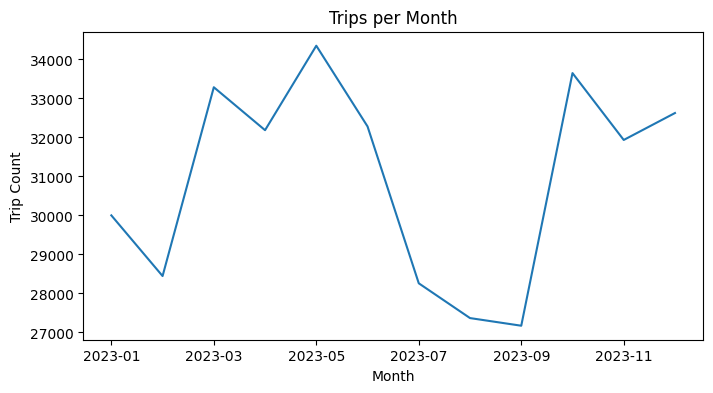

In [165]:
trips_month = df.groupby("year_month").size()
trips_month.plot(figsize=(8,4))
plt.title("Trips per Month")
plt.xlabel("Month")
plt.ylabel("Trip Count")
plt.show()


<h1>Multivariate Analysis</h1>

<h3>Tip % by payment type</h3>

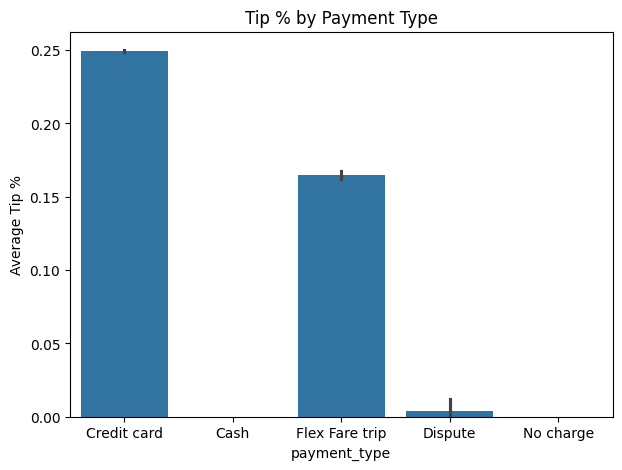

In [166]:
df["tip_pct"] = np.where(df["fare_amount"] > 0, df["tip_amount"] / df["fare_amount"], 0)

plt.figure(figsize=(7,5))
sns.barplot(x="payment_type", y="tip_pct", data=df)
plt.title("Tip % by Payment Type")
plt.ylabel("Average Tip %")
plt.show()


<h3>Heatmap (Weekday vs Hour demand)</h3>

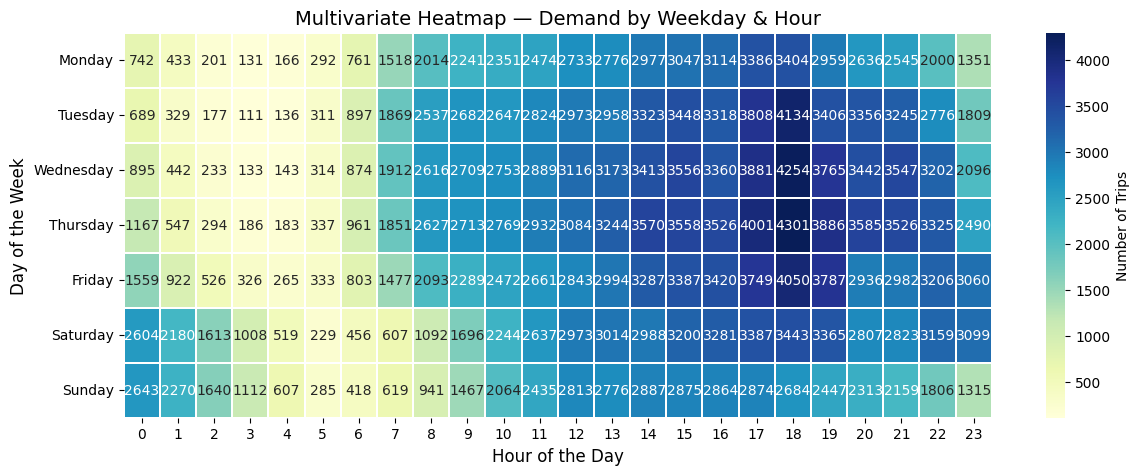

In [175]:
# ✅ ensure datetime conversion
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"], errors="coerce")
df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"], errors="coerce")

# ✅ create weekday + hour fields
df["pickup_weekday"] = df["tpep_pickup_datetime"].dt.day_name()
df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour

# ✅ Pivot table (Weekday vs Hour)
pivot = df.pivot_table(
    index="pickup_weekday",
    columns="pickup_hour",
    values="trip_distance",
    aggfunc="count",
    fill_value=0
)

ordered_weekdays = [
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
]
pivot = pivot.reindex(ordered_weekdays)

plt.figure(figsize=(14, 5))
sns.heatmap(
    pivot,
    cmap="YlGnBu",
    annot=True,
    fmt=".0f",
    linewidths=0.3,
    cbar_kws={"label": "Number of Trips"}
)

plt.title("Multivariate Heatmap — Demand by Weekday & Hour", fontsize=14)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Day of the Week", fontsize=12)
plt.show()







<h1>CORRELATION MATRIX + HEATMAP</h1>

In [168]:
# Convert pickup and dropoff time to datetime if not already done
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"], errors="coerce")
df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"], errors="coerce")

# ✅ Create trip duration column (in minutes)
df["trip_duration_min"] = (df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]).dt.total_seconds() / 60


Numeric columns used in correlation:
['passenger_count', 'trip_distance', 'PULocationID', 'DOLocationID', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee', 'trip_duration_min', 'tip_pct']


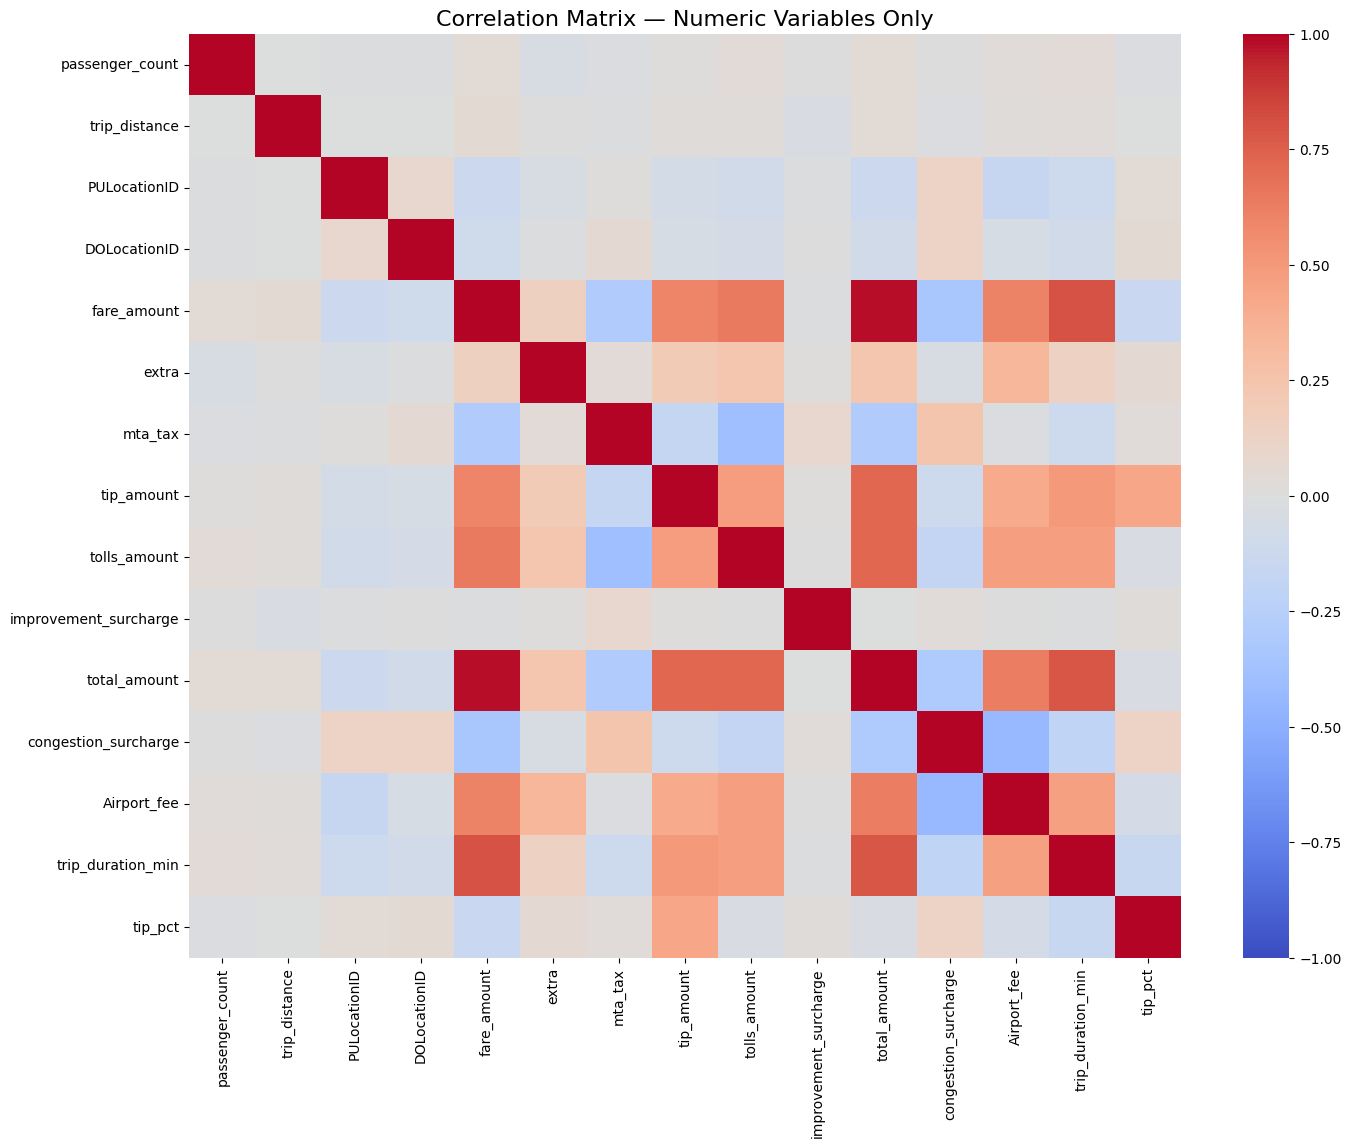

In [177]:
# ------------------ CLEAN CORRELATION ANALYSIS ------------------

# 1. Extract useful numeric features from datetime
df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour
df["pickup_weekday"] = df["tpep_pickup_datetime"].dt.weekday
df["pickup_month"] = df["tpep_pickup_datetime"].dt.month

df["dropoff_hour"] = df["tpep_dropoff_datetime"].dt.hour
df["dropoff_weekday"] = df["tpep_dropoff_datetime"].dt.weekday
df["dropoff_month"] = df["tpep_dropoff_datetime"].dt.month

# 2. Select only REAL numeric columns
numeric_df = df.select_dtypes(include=["int64", "float64"])

print("Numeric columns used in correlation:")
print(list(numeric_df.columns))

# 3. Compute correlation matrix
corr_matrix = numeric_df.corr()

# 4. Plot heatmap with strong color intensity
plt.figure(figsize=(16,12))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",   # intense & clear color scale
    vmin=-1, vmax=1,   # full correlation range
    annot=False        # switch to True if you want values on heatmap
)
plt.title("Correlation Matrix — Numeric Variables Only", fontsize=16)
plt.show()



✅ Total columns included in correlation: 29
Columns used:
['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee', 'pickup_borough', 'pickup_zone', 'dropoff_borough', 'dropoff_zone', 'payment_method', 'year_month', 'trip_duration_min', 'pickup_hour', 'pickup_weekday', 'tip_pct']

📌 FULL CORRELATION MATRIX:
                       VendorID  tpep_pickup_datetime  tpep_dropoff_datetime  \
VendorID               1.000000              0.025198               0.025199   
tpep_pickup_datetime   0.025198              1.000000               1.000000   
tpep_dropoff_datetime  0.025199              1.000000               1.000000   
passenger_count        0.093069              0.006790               0.006793   
trip_distance         

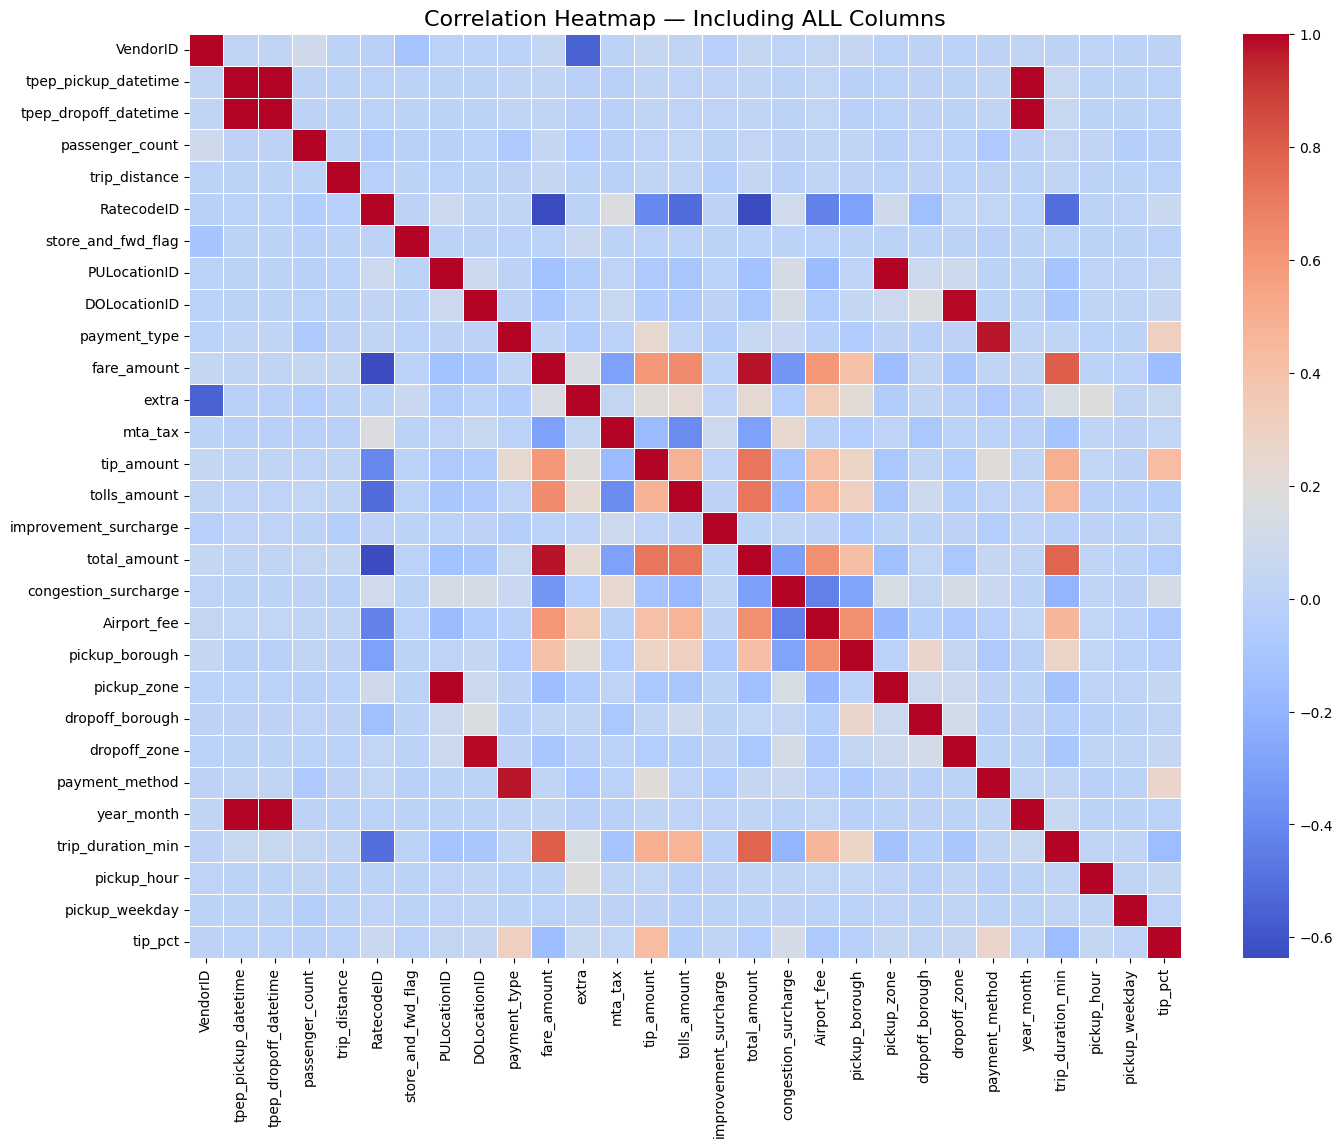

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Make a copy of the dataset to avoid modifying the original
df_corr = df.copy()

# ✅ Convert datetime columns into numerical values
for col in df_corr.select_dtypes(include=["datetime64[ns]"]):
    df_corr[col] = df_corr[col].astype("int64")  # convert to timestamp (nanoseconds)

# ✅ Label encode categorical columns (VendorID, payment_type, etc.)
label_encoder = LabelEncoder()

for col in df_corr.select_dtypes(include=["object", "category"]):
    df_corr[col] = label_encoder.fit_transform(df_corr[col].astype(str))

# ✅ Now select ALL columns that are numeric (including transformed)
numeric_df = df_corr.select_dtypes(include=["int64", "float64", "int32", "float32"])

print(f"✅ Total columns included in correlation: {numeric_df.shape[1]}")
print("Columns used:")
print(list(numeric_df.columns))

# ✅ Compute correlation matrix of ALL columns
corr_matrix = numeric_df.corr()

print("\n📌 FULL CORRELATION MATRIX:")
print(corr_matrix)

# ✅ Heatmap of all columns
plt.figure(figsize=(16,12))
sns.heatmap(
    corr_matrix,
    annot=False,     # change to True if you want the numbers printed inside
    cmap="coolwarm",
    linewidths=0.4
)

plt.title("Correlation Heatmap — Including ALL Columns", fontsize=16)
plt.show()
